# Iris Dataset

<br>
In this notebook, I looked at the classic Iris dataset. After exploratory data analysis, I used machine learning to predict petal width using petal length.

<br>
## Import libraries and get data

In [1]:
import pandas as pd

In [2]:
import seaborn

In [3]:
from matplotlib import pyplot as plt

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, KFold,learning_curve

In [6]:
import numpy as np

In [7]:
import lcplot

In [8]:
data = pd.read_csv('iris.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<br>
## Exploratory Data Analysis

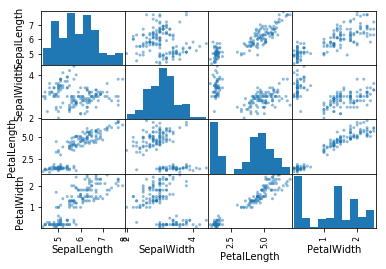

In [9]:
pd.plotting.scatter_matrix(data)
plt.show()

Several of the variables show strong linear correlation, and the strongest relationship seems to be between petal width and petal length.

In [10]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<br>
## Use Petal Width to Predict  Petal Length

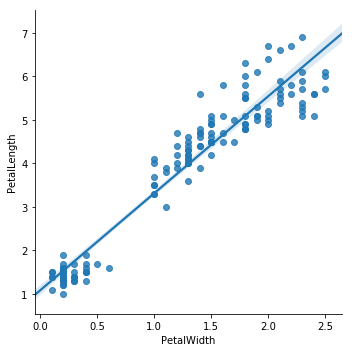

In [11]:
seaborn.lmplot(x='PetalWidth',y='PetalLength',data=data)
plt.show()

In [12]:
x = data[['PetalLength']]
y = data['PetalWidth']

<br>
Use a learning curve to determine the optimal training size to use for the model

[0.3   0.425 0.55  0.675 0.8  ]


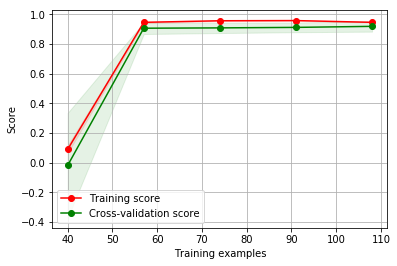

In [14]:
model = LinearRegression()
lcplot.plot(model,x,y,cv=KFold(n_splits=10,shuffle=True))
plt.show()

<br>
The learning curve is stabilized after 60, so a train size of 70% is sufficient.

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,train_size=0.7)
model.fit(xTrain,yTrain)

print('Equation: PetalWidth = {0:.2f}*PetalLength{1:.2f}'.format(model.coef_[0], model.intercept_))

Equation: PetalWidth = 0.41*PetalLength-0.35


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


<br>
Evaluate the model using cross-validation

In [18]:
# Use cross-validation to avoid baised splitting
scores = cross_val_score(model,x,y,cv=KFold(n_splits=10,shuffle=True))

# Use the average from all scores
scores.mean()
print('Score: {0:.2f}'.format(model.score(xTest,yTest)))

Score: 0.91


<br>
Plot the resulting model

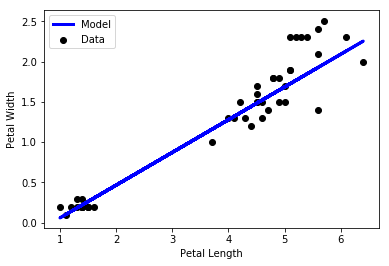

In [27]:
yPred = model.predict(xTest)

plt.scatter(xTest, yTest,  color='black', label='Data')
plt.plot(xTest, yPred, color='blue', linewidth=3, label='Model')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()